In [ ]:
import csv

tA = [] # sigA
tB = [] # sigB
tC = [] # sigC
tD = [] # sigD
dataA = [] # sigA
dataB = [] # sigB
dataC = [] # sigC
dataD = [] # sigD

with open('/Users/theyiranhuang/Documents/GitHub/ME433/HW10/dsp/sigA.csv') as f:
    # open the csv file
    reader = csv.reader(f)
    for row in reader:
        # read the rows 1 one by one
        tA.append(float(row[0])) # leftmost column
        dataA.append(float(row[1])) # second column
        # data2.append(float(row[2])) # third column

with open('/Users/theyiranhuang/Documents/GitHub/ME433/HW10/dsp/sigB.csv') as f:
    # open the csv file
    reader = csv.reader(f)
    for row in reader:
        # read the rows 1 one by one
        tB.append(float(row[0])) # leftmost column
        dataB.append(float(row[1])) # second column
        # data2.append(float(row[2])) # third column

with open('/Users/theyiranhuang/Documents/GitHub/ME433/HW10/dsp/sigC.csv') as f:
    # open the csv file
    reader = csv.reader(f)
    for row in reader:
        # read the rows 1 one by one
        tC.append(float(row[0])) # leftmost column
        dataC.append(float(row[1])) # second column
        # data2.append(float(row[2])) # third column

with open('/Users/theyiranhuang/Documents/GitHub/ME433/HW10/dsp/sigD.csv') as f:
    # open the csv file
    reader = csv.reader(f)
    for row in reader:
        # read the rows 1 one by one
        tD.append(float(row[0])) # leftmost column
        dataD.append(float(row[1])) # second column
        # data2.append(float(row[2])) # third column

for i in range(2):
    # print the data to verify it was read
    print(str(tA[i]) + ", " + str(dataA[i]))
    print(str(tB[i]) + ", " + str(dataB[i]))
    print(str(tC[i]) + ", " + str(dataC[i]))
    print(str(tD[i]) + ", " + str(dataD[i]))


In [ ]:
import matplotlib.pyplot as plt # for plotting
import numpy as np # for sine function

# dt = 1.0/100.0 # 100Hz
# t = np.arange(0.0, 5.0, dt) # for 5s

# s = 2.0 * np.sin(2 * np.pi * 2.3 * t) + 2.5 # 2.3Hz

plt.plot(tA,dataA,'b-*')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.title('Signal A vs Time')
plt.show()

plt.plot(tB,dataB,'b-*')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.title('Signal B vs Time')
plt.show()

plt.plot(tC,dataC,'b-*')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.title('Signal C vs Time')
plt.show()

plt.plot(tD,dataD,'b-*')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.title('Signal D vs Time')
plt.show()

In [86]:
def calc_fft(t,data):
    dt = (t[-1]-t[0])/len(t)
    Fs = 1.0/dt # sample rate
    # print("Fs = ", Fs)
    Ts = t[-1]
    ts = np.arange(0,t[-1],Ts) # time vector
    y = data # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    return frq,Y

def plot_fft(t,data):
    frq,Y = calc_fft(t,data)
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,data,'b')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax1.set_title('Signal vs Time')
    ax2.loglog(frq,abs(Y),'b') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    ax2.set_title('Signal FFT')
    plt.tight_layout()
    plt.show()

def compare_fft(t1, data1, t2, data2):
    frq1,Y1 = calc_fft(t1,data1) # unfiltered
    frq2,Y2 = calc_fft(t2,data2) # filtered
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t1,data1,'b',t2,data2,'r')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax1.set_title('Signal A vs Time')
    ax2.loglog(frq1,abs(Y1),'b',frq2,abs(Y2),'r') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    ax2.set_title('Signal A FFT')
    plt.tight_layout()
    plt.show()

In [73]:
def maf(num,t,data):
    mafA = []
    for i in range(len(data)):
        if i < num:
            mafA.append(0)
        else:
            avg = sum(data[i-num:i])/num
            mafA.append(avg)
    compare_fft(t, data, t, mafA)


In [83]:
def iir(A,B,t,data):
    iirA = []
    avg = 0
    for i in range(len(data)):
        avg = A*avg+B*data[i]
        iirA.append(avg)
    compare_fft(t, data, t, iirA)

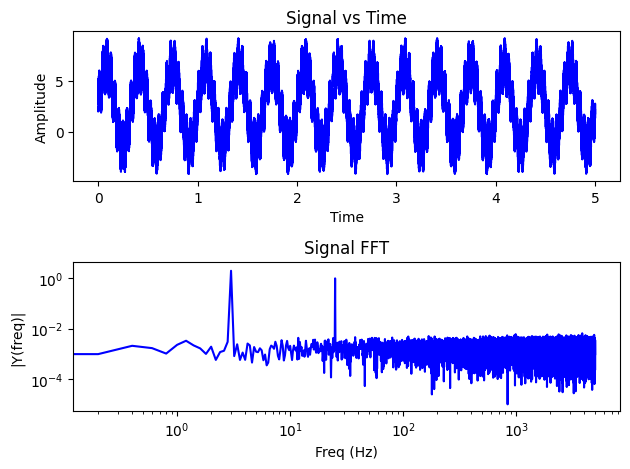

In [87]:
plot_fft(tA,dataA)

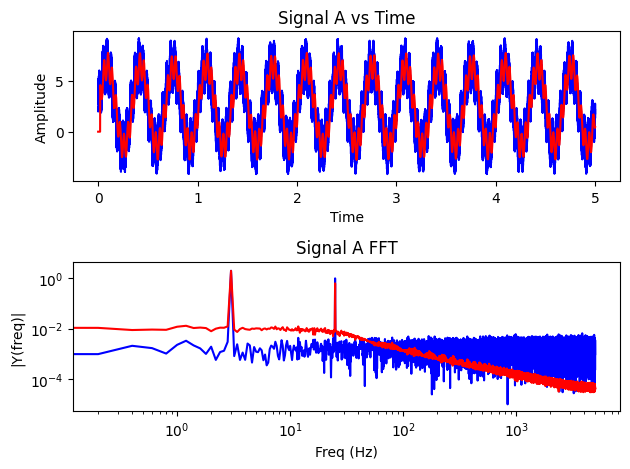

In [88]:
maf(200,tA,dataA)

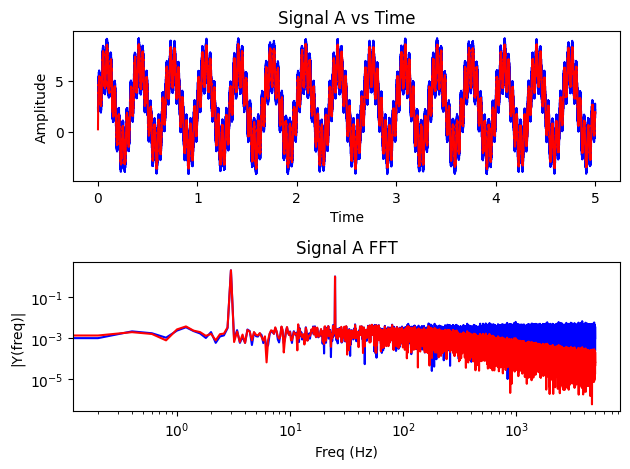

In [89]:
iir(0.9,0.1,tA,dataA)